In [1]:
import pandas as pd
import numpy as np

import os
import sys
from sys import argv
import pickle
import random
import joblib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, mean_absolute_error

In [2]:
# path to project folder
# please change to your own
PATH = os.getcwd()

color_palette = ["#000","#778899"]

palette = sns.color_palette(color_palette)
sns.set_palette(palette)

In [3]:
datasets = ["diabetes", "breast_cancer", "income", "housing", "student_scores", "bike_sharing"]
classifiers = ["decision_tree", "xgboost"]
data_names = {"breast_cancer":"Breast Cancer", "diabetes":"Diabetes", "income": "Adult Income",
              "housing": "House Prices", "student_scores": "Student Scores", "bike_sharing": "Bike Rentals"}
explainers = ["LIME", "SHAP"]

all_data = pd.DataFrame()

for data in datasets:
    
    for classifier in classifiers:
        results = pd.read_csv(os.path.join(PATH, data, classifier, "results.csv"), sep = ";")
        results["Classifier"] = [classifier]*results.shape[0]
        results["Dataset"] = [data_names[data]]*results.shape[0]
        all_data = all_data.append(results)
        preds = all_data["Prediction"]
        
diabetes_data = all_data[all_data["Dataset"]=="Diabetes"]
cancer_data = all_data[all_data["Dataset"]=="Breast Cancer"]
income_data = all_data[all_data["Dataset"] == data_names['income']]

housing_data = all_data[all_data["Dataset"] == data_names['housing']]
student_data = all_data[all_data["Dataset"] == data_names['student_scores']]
bike_data = all_data[all_data["Dataset"] == data_names['bike_sharing']]

In [4]:
classification_results = [diabetes_data, cancer_data, income_data]

for each in classification_results:
    preds = each["Prediction"]
    int_preds = [int(pred) for pred in preds]
    each["Prediction"] = int_preds

# Diabetes

SHAP Precision:	 0.9722222222318839
SHAP Recall:	 0.9396135265724639
LIME Precision:	 0.8937198067753623
LIME Recall:	 0.9981884057971014


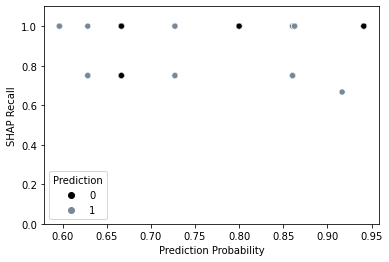

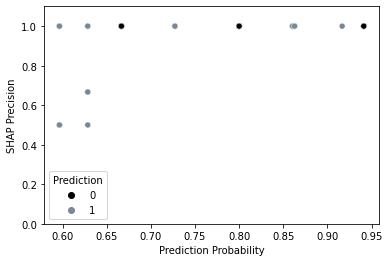

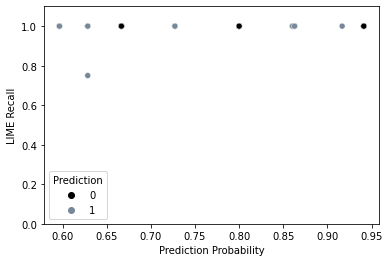

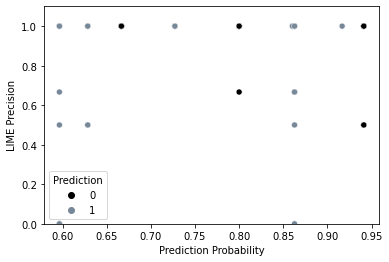

In [5]:
dt_data = diabetes_data[diabetes_data["Classifier"] == "decision_tree"]
print("SHAP Precision:\t", np.mean(dt_data["SHAP Precision"]))
print("SHAP Recall:\t", np.mean(dt_data["SHAP Recall"]))
print("LIME Precision:\t", np.mean(dt_data["LIME Precision"]))
print("LIME Recall:\t", np.mean(dt_data["LIME Recall"]))

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Recall"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Precision"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Recall"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Precision"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()


SHAP Supporting:	 0.9824422593845066
SHAP Contrary:	 0.44798792032518475
LIME Supporting:	 0.928612053006416
LIME Contrary:	 0.4566149901984705


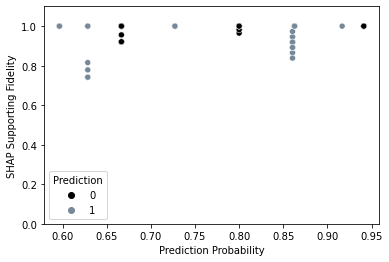

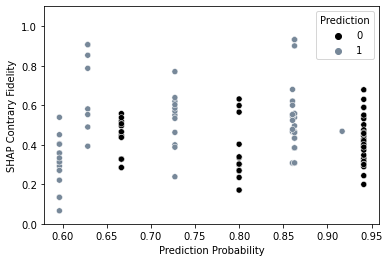

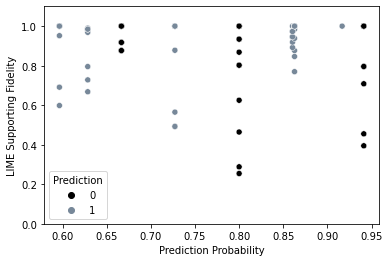

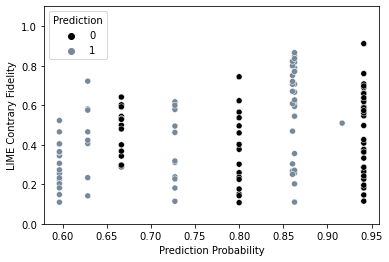

In [6]:
print("SHAP Supporting:\t", np.mean(dt_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(dt_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(dt_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(dt_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Supporting Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Contrary Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Supporting Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Contrary Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()


SHAP Supporting:	 0.8984019745506326
SHAP Contrary:	 0.16686020665822784
LIME Supporting:	 0.8104936021202529
LIME Contrary:	 0.5022754076455695


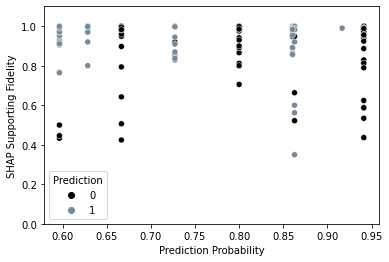

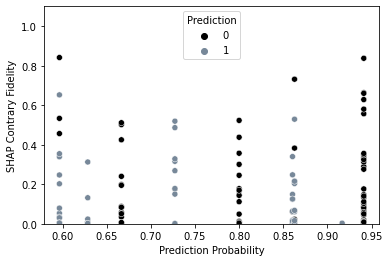

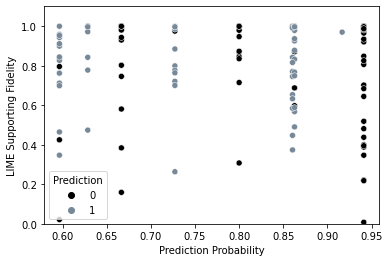

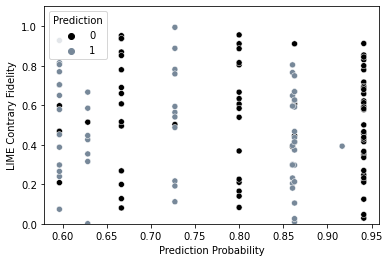

In [7]:
xgb_data = diabetes_data[diabetes_data["Classifier"] == "xgboost"]
print("SHAP Supporting:\t", np.mean(xgb_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(xgb_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(xgb_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(xgb_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["SHAP Supporting Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["SHAP Contrary Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["LIME Supporting Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["LIME Contrary Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

# Breast Cancer

SHAP Precision:	 1.0
SHAP Recall:	 0.8516949152542372
LIME Precision:	 1.0
LIME Recall:	 0.8545197740112994


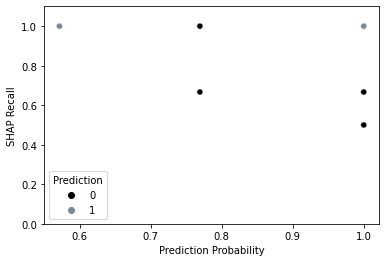

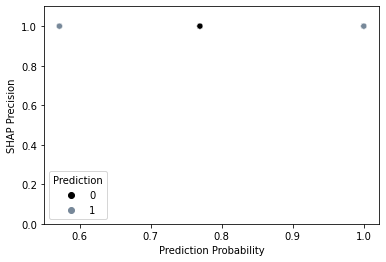

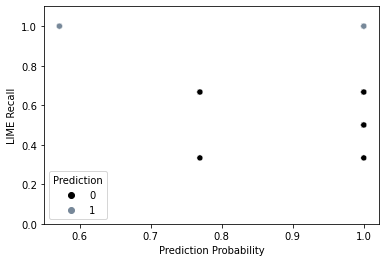

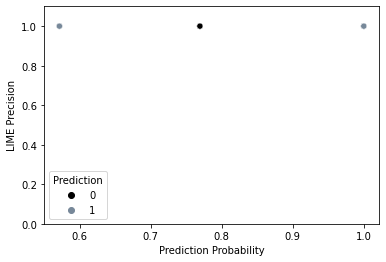

In [8]:
dt_data = cancer_data[cancer_data["Classifier"] == "decision_tree"]
print("SHAP Precision:\t", np.mean(dt_data["SHAP Precision"]))
print("SHAP Recall:\t", np.mean(dt_data["SHAP Recall"]))
print("LIME Precision:\t", np.mean(dt_data["LIME Precision"]))
print("LIME Recall:\t", np.mean(dt_data["LIME Recall"]))

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Recall"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Precision"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Recall"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Precision"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()


SHAP Supporting:	 1.0
SHAP Contrary:	 0.6701238591916558
LIME Supporting:	 0.9288647792885081
LIME Contrary:	 0.37800894021233006


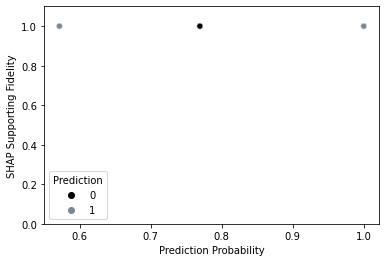

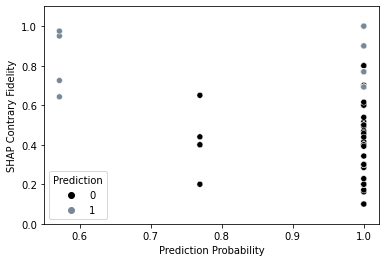

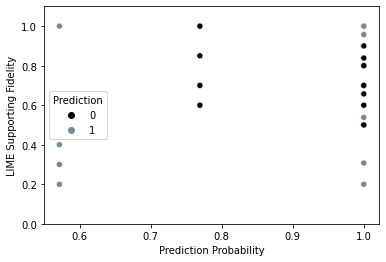

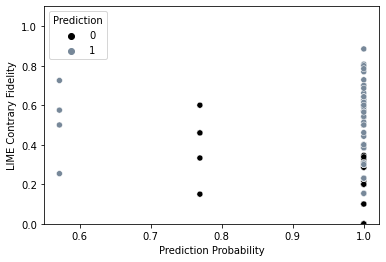

In [9]:
print("SHAP Supporting:\t", np.mean(dt_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(dt_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(dt_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(dt_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Supporting Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Contrary Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Supporting Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Contrary Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

SHAP Supporting:	 0.996818479572997
SHAP Contrary:	 0.007632661775105822
LIME Supporting:	 0.9810418406792498
LIME Contrary:	 0.11254793228881327


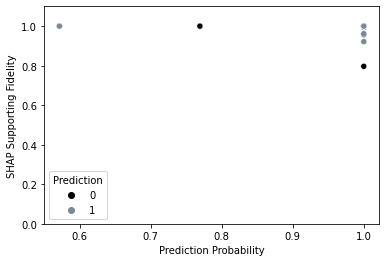

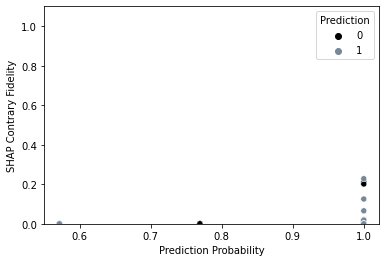

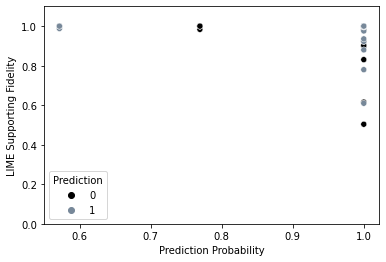

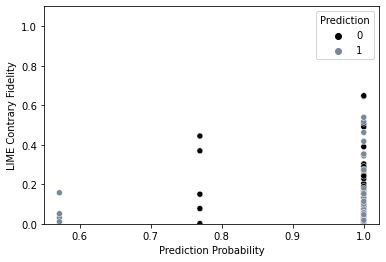

In [10]:
xgb_data = cancer_data[cancer_data["Classifier"] == "xgboost"]
print("SHAP Supporting:\t", np.mean(xgb_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(xgb_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(xgb_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(xgb_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["SHAP Supporting Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["SHAP Contrary Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["LIME Supporting Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["LIME Contrary Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

# Income

SHAP Precision:	 0.8495273516193899
SHAP Recall:	 0.9916576269435268
LIME Precision:	 0.9583914458391446
LIME Recall:	 0.7563201417106548


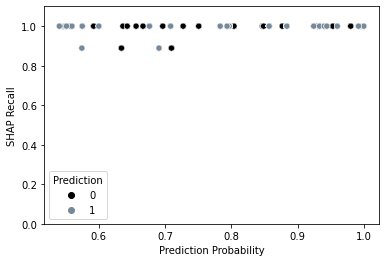

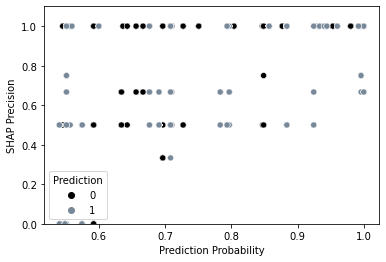

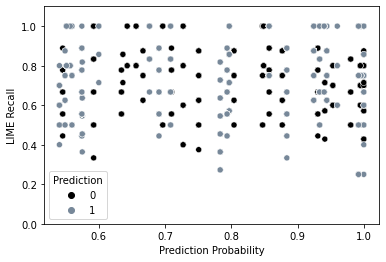

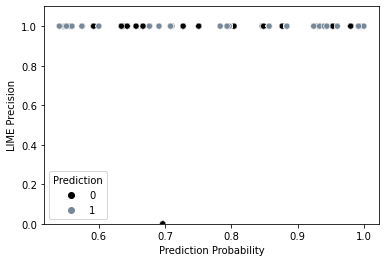

In [11]:
dt_data = income_data[income_data["Classifier"] == "decision_tree"]
print("SHAP Precision:\t", np.mean(dt_data["SHAP Precision"]))
print("SHAP Recall:\t", np.mean(dt_data["SHAP Recall"]))
print("LIME Precision:\t", np.mean(dt_data["LIME Precision"]))
print("LIME Recall:\t", np.mean(dt_data["LIME Recall"]))

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Recall"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Precision"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Recall"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Precision"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()


SHAP Supporting:	 0.8031804813564097
SHAP Contrary:	 0.4102702801538075
LIME Supporting:	 0.9036380152730978
LIME Contrary:	 0.1591775031531908


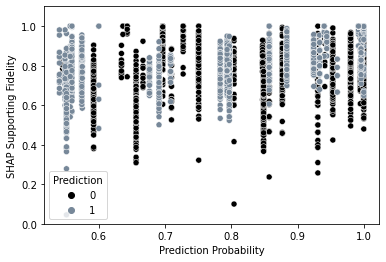

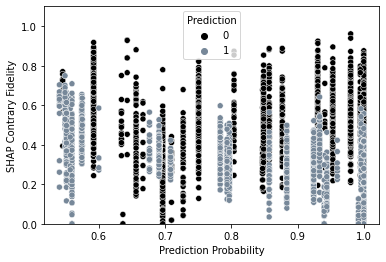

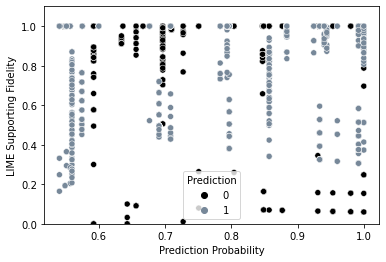

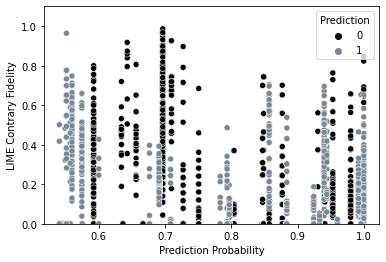

In [12]:
print("SHAP Supporting:\t", np.mean(dt_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(dt_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(dt_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(dt_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Supporting Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["SHAP Contrary Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Supporting Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], dt_data["LIME Contrary Fidelity"], hue = dt_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

SHAP Supporting:	 0.9816171783554054
SHAP Contrary:	 0.11765752837796079
LIME Supporting:	 0.67299191438267
LIME Contrary:	 0.37015781011861587


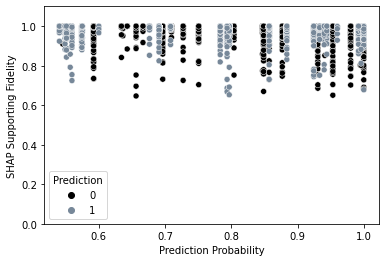

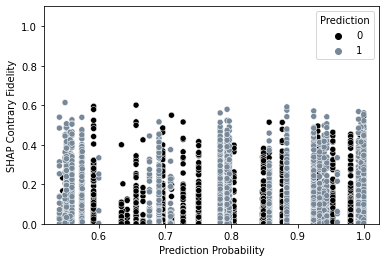

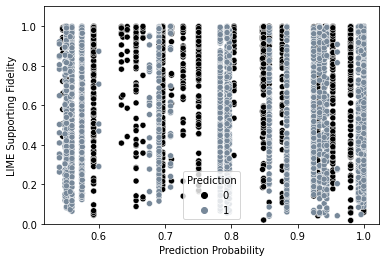

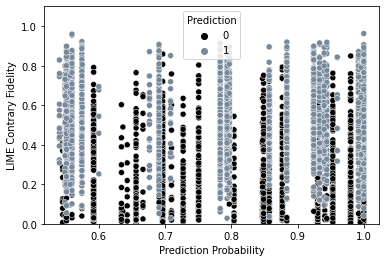

In [13]:
xgb_data = income_data[income_data["Classifier"] == "xgboost"]
print("SHAP Supporting:\t", np.mean(xgb_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(xgb_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(xgb_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(xgb_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["SHAP Supporting Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["SHAP Contrary Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["LIME Supporting Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction Probability"], xgb_data["LIME Contrary Fidelity"], hue = xgb_data["Prediction"])
plt.ylim(0,1.1)
plt.show()

# Housing

SHAP Precision:	 0.9320175438596491
SHAP Recall:	 0.882082811194653
LIME Precision:	 0.8168859649122807
LIME Recall:	 0.8846856725146199


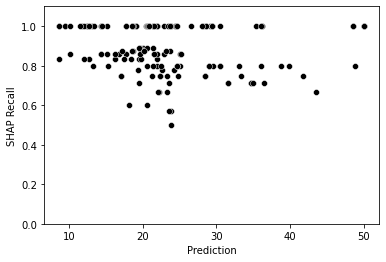

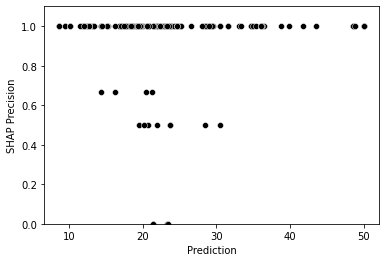

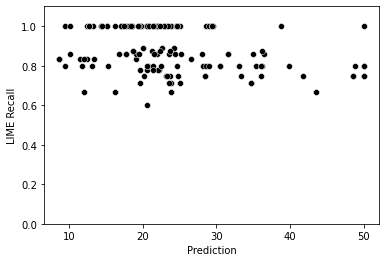

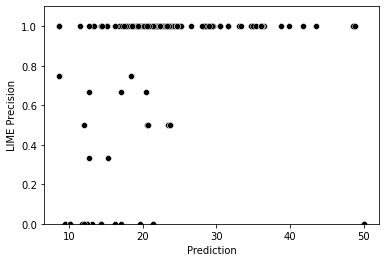

In [14]:
dt_data = housing_data[housing_data["Classifier"] == "decision_tree"]
print("SHAP Precision:\t", np.mean(dt_data["SHAP Precision"]))
print("SHAP Recall:\t", np.mean(dt_data["SHAP Recall"]))
print("LIME Precision:\t", np.mean(dt_data["LIME Precision"]))
print("LIME Recall:\t", np.mean(dt_data["LIME Recall"]))

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Recall"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Precision"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Recall"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Precision"])
plt.ylim(0,1.1)
plt.show()


SHAP Supporting:	 1.0
SHAP Contrary:	 0.0
LIME Supporting:	 1.0
LIME Contrary:	 0.0


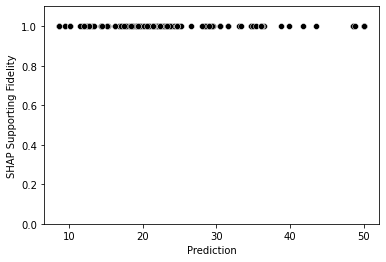

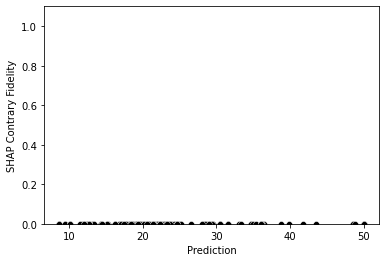

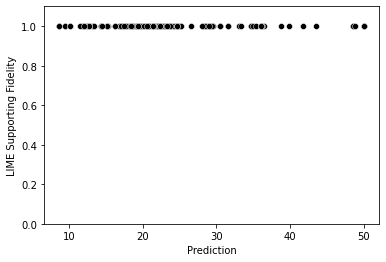

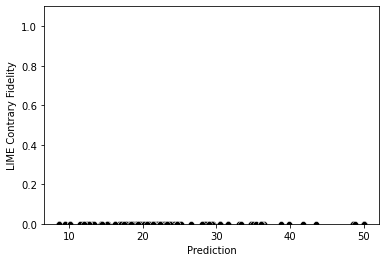

In [15]:
print("SHAP Supporting:\t", np.mean(dt_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(dt_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(dt_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(dt_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

SHAP Supporting:	 1.0
SHAP Contrary:	 0.0
LIME Supporting:	 1.0
LIME Contrary:	 0.0


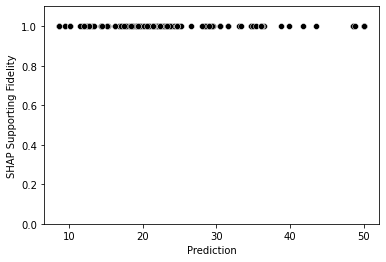

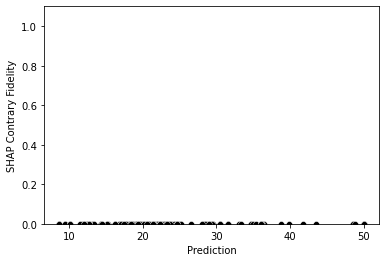

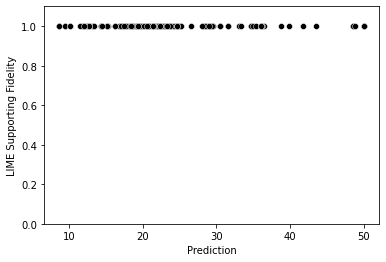

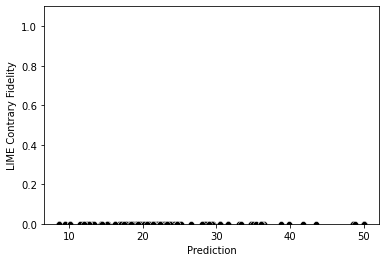

In [16]:
xgb_data = housing_data[housing_data["Classifier"] == "xgboost"]
print("SHAP Supporting:\t", np.mean(xgb_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(xgb_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(xgb_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(xgb_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction"], xgb_data["SHAP Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["SHAP Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["LIME Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["LIME Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

# Bike Sharing

SHAP Precision:	 0.9991049737885178
SHAP Recall:	 0.824659688008357
LIME Precision:	 1.0
LIME Recall:	 0.8030583314098823


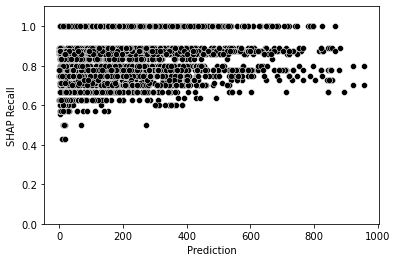

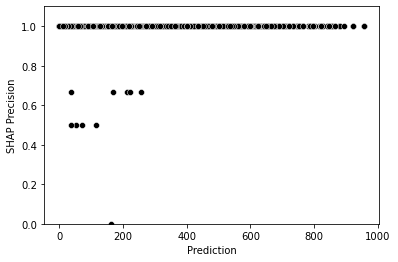

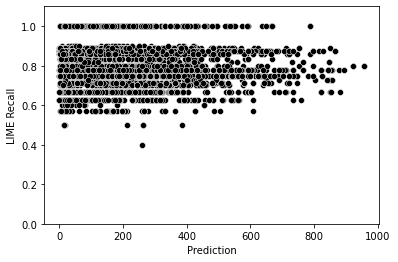

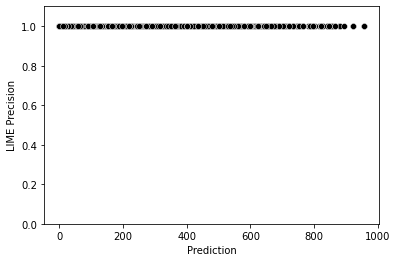

In [17]:
dt_data = bike_data[bike_data["Classifier"] == "decision_tree"]
print("SHAP Precision:\t", np.mean(dt_data["SHAP Precision"]))
print("SHAP Recall:\t", np.mean(dt_data["SHAP Recall"]))
print("LIME Precision:\t", np.mean(dt_data["LIME Precision"]))
print("LIME Recall:\t", np.mean(dt_data["LIME Recall"]))

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Recall"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Precision"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Recall"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Precision"])
plt.ylim(0,1.1)
plt.show()


SHAP Supporting:	 1.0
SHAP Contrary:	 0.0
LIME Supporting:	 1.0
LIME Contrary:	 0.0


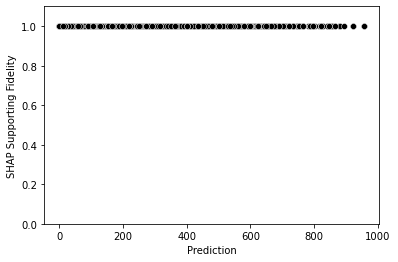

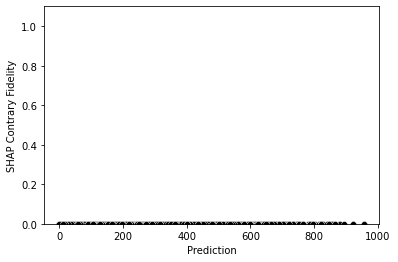

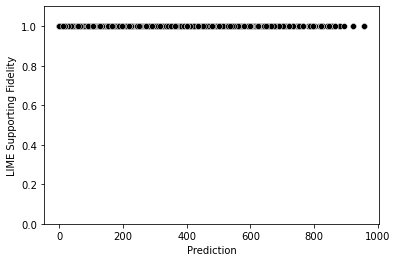

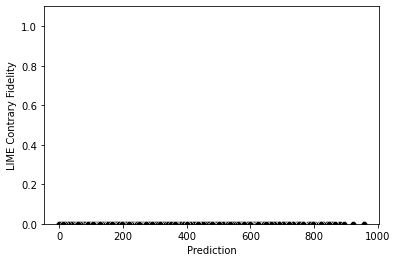

In [18]:
print("SHAP Supporting:\t", np.mean(dt_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(dt_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(dt_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(dt_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

SHAP Supporting:	 1.0
SHAP Contrary:	 0.0
LIME Supporting:	 1.0
LIME Contrary:	 0.0


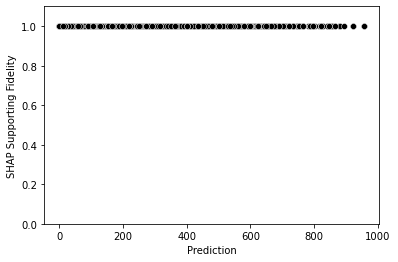

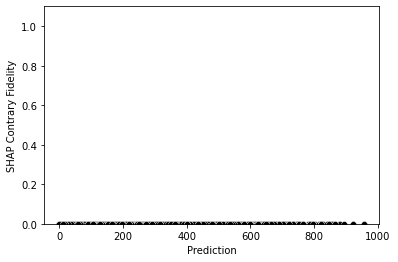

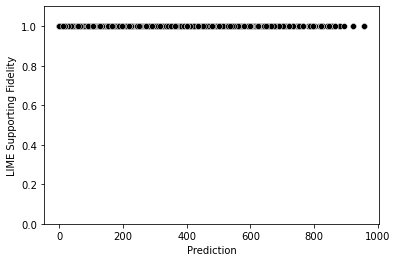

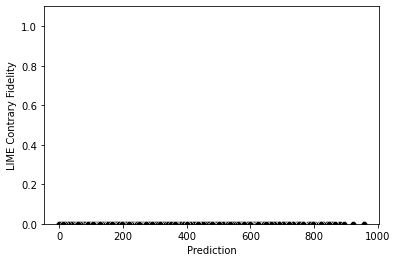

In [19]:
xgb_data = bike_data[bike_data["Classifier"] == "xgboost"]
print("SHAP Supporting:\t", np.mean(xgb_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(xgb_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(xgb_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(xgb_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction"], xgb_data["SHAP Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["SHAP Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["LIME Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["LIME Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

# Student Scores

SHAP Precision:	 0.9948717948717949
SHAP Recall:	 0.9903846153846154
LIME Precision:	 0.9401709401709403
LIME Recall:	 0.802222222222222


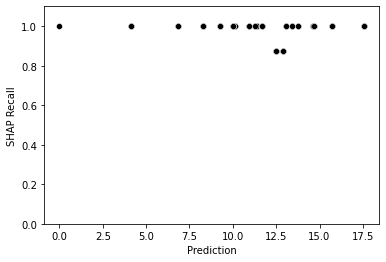

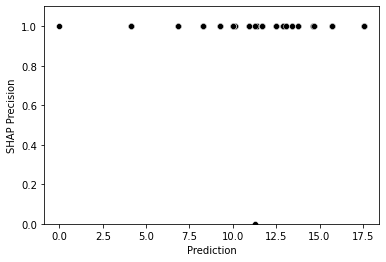

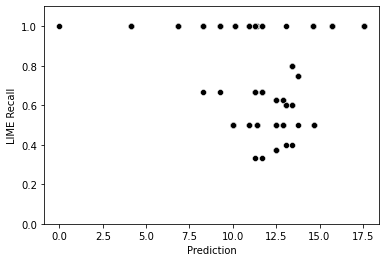

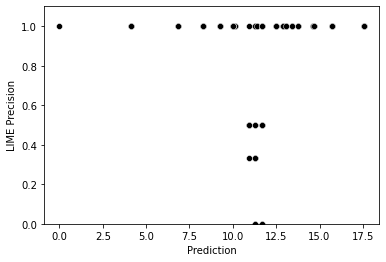

In [20]:
dt_data = student_data[student_data["Classifier"] == "decision_tree"]
print("SHAP Precision:\t", np.mean(dt_data["SHAP Precision"]))
print("SHAP Recall:\t", np.mean(dt_data["SHAP Recall"]))
print("LIME Precision:\t", np.mean(dt_data["LIME Precision"]))
print("LIME Recall:\t", np.mean(dt_data["LIME Recall"]))

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Recall"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Precision"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Recall"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Precision"])
plt.ylim(0,1.1)
plt.show()


SHAP Supporting:	 1.0
SHAP Contrary:	 0.0
LIME Supporting:	 1.0
LIME Contrary:	 0.0


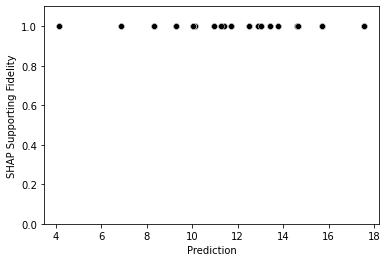

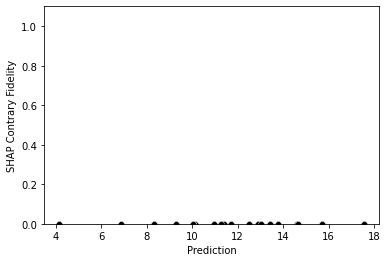

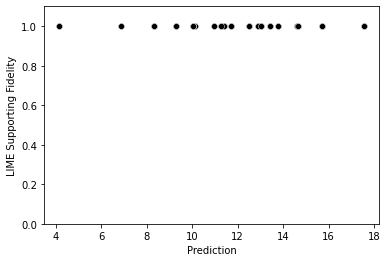

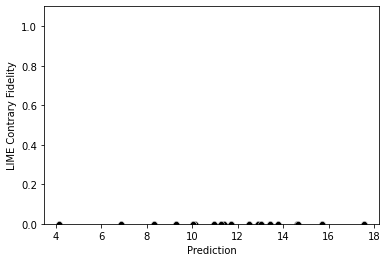

In [21]:
print("SHAP Supporting:\t", np.mean(dt_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(dt_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(dt_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(dt_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["SHAP Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], dt_data["LIME Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

SHAP Supporting:	 1.0
SHAP Contrary:	 0.0
LIME Supporting:	 1.0
LIME Contrary:	 0.0


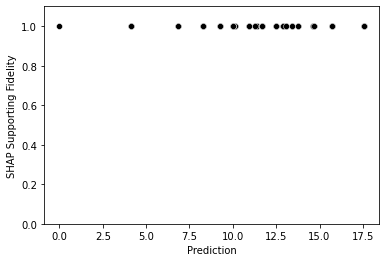

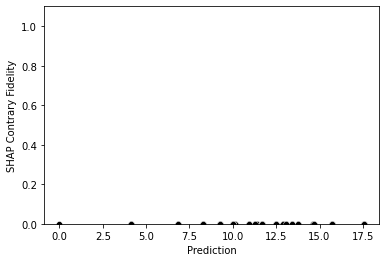

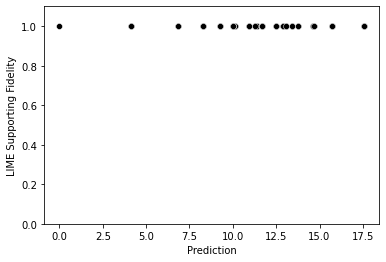

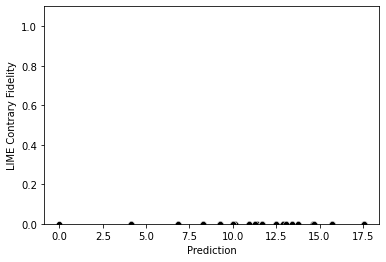

In [22]:
xgb_data = student_data[student_data["Classifier"] == "xgboost"]
print("SHAP Supporting:\t", np.mean(xgb_data["SHAP Supporting Fidelity"]))
print("SHAP Contrary:\t", np.mean(xgb_data["SHAP Contrary Fidelity"]))
print("LIME Supporting:\t", np.mean(xgb_data["LIME Supporting Fidelity"]))
print("LIME Contrary:\t", np.mean(xgb_data["LIME Contrary Fidelity"]))

sns.scatterplot(dt_data["Prediction"], xgb_data["SHAP Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["SHAP Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["LIME Supporting Fidelity"])
plt.ylim(0,1.1)
plt.show()

sns.scatterplot(dt_data["Prediction"], xgb_data["LIME Contrary Fidelity"])
plt.ylim(0,1.1)
plt.show()